In [5]:
import requests

In [6]:
url = requests.get('https://www.worldometers.info/coronavirus')

In [7]:
from bs4 import BeautifulSoup

In [8]:
soup = BeautifulSoup(url.content, 'html')

In [9]:
#soup

In [10]:
table = soup.find('table', attrs={'id':'main_table_countries_today'})

In [11]:
#table

In [12]:
rows = table.find_all("tr", attrs={'style': ""})

In [13]:
#rows

In [14]:
data = []
for i, item in enumerate(rows):
    if i == 0:
        data.append(item.text.strip(). split("\n")[1:13])
    else:
        data.append(item.text.strip(). split("\n")[1:12])

In [15]:
#data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.DataFrame(data)
df = pd.DataFrame(data[2:], columns = data[0][:11])

In [18]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,"24,632,292","+5,851","408,683",+60,"14,554,179","+2,493","9,669,430","28,553","74,178","1,231"
1,India,"10,582,647",,"152,593",,"10,228,753",+901,"201,301","8,944","7,627",110
2,Brazil,"8,512,238",,"210,328",,"7,452,047",,"849,863","8,318","39,890",986
3,Russia,"3,612,800","+21,734","66,623",+586,"3,002,026","+23,262","544,151","2,300","24,750",456
4,UK,"3,433,494",,"89,860",,"1,546,575",,"1,797,059","3,789","50,431","1,320"


In [19]:
df.rename(columns={"Country,Other": "Country","Serious,Critical": "Critical"}, inplace = True)

In [20]:
df.to_csv('COVID-19.csv')

In [21]:
data =df.iloc[0:7]

In [22]:
data

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop
0,USA,"24,632,292","+5,851","408,683",+60,"14,554,179","+2,493","9,669,430","28,553","74,178","1,231"
1,India,"10,582,647",,"152,593",,"10,228,753",+901,"201,301","8,944","7,627",110
2,Brazil,"8,512,238",,"210,328",,"7,452,047",,"849,863","8,318","39,890",986
3,Russia,"3,612,800","+21,734","66,623",+586,"3,002,026","+23,262","544,151","2,300","24,750",456
4,UK,"3,433,494",,"89,860",,"1,546,575",,"1,797,059","3,789","50,431","1,320"
5,France,"2,914,725",,"70,686",,"210,200",,"2,633,839","2,813","44,600","1,082"
6,Turkey,"2,392,963",,"24,161",,"2,270,769",,"98,033","2,183","28,207",285


In [23]:
#WITHOUT CHANGING DATA FROM STRING TO INTERGER

In [24]:
#plt.figure(figsize=(20,8))
#plt.barh(data["Country"],data["TotalCases"])
#plt.title("Top Ten Countries with COVID-19 Cases ",fontsize = 30)
#plt.xlabel("Total cases", fontsize=30)
#plt.ylabel("Countries", fontsize=30)
#plt.xticks(fontsize = 20)
#plt.yticks(fontsize = 20)
#plt.show()

In [25]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['TotalCases']= data['TotalCases'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


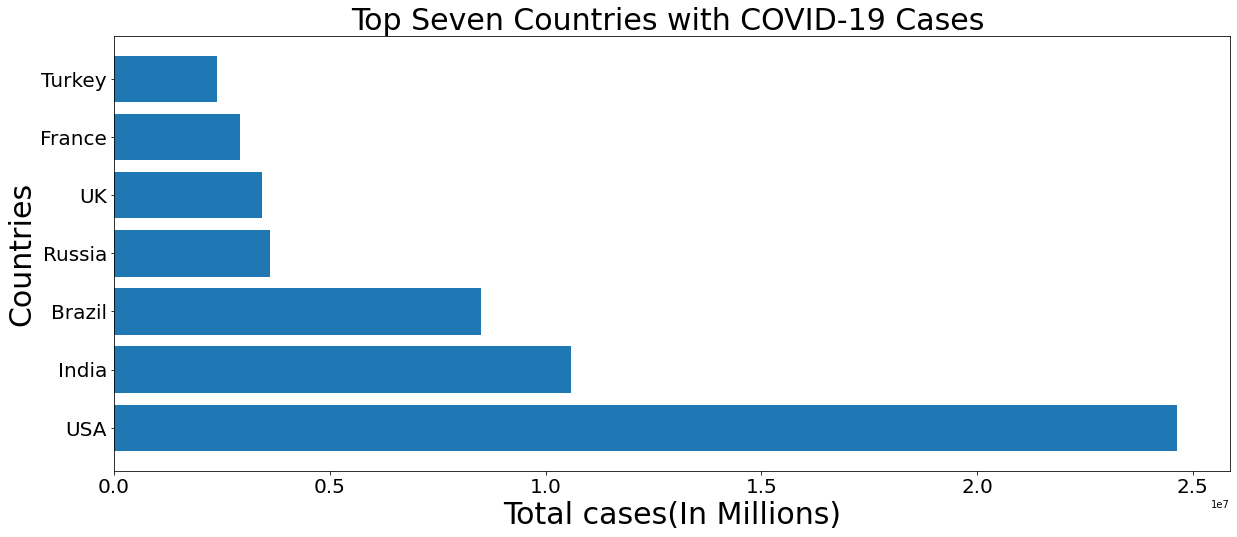

In [27]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["TotalCases"])
plt.title("Top Seven Countries with COVID-19 Cases ",fontsize = 30)
plt.xlabel("Total cases(In Millions)", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [28]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['TotalDeaths']= data['TotalDeaths'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


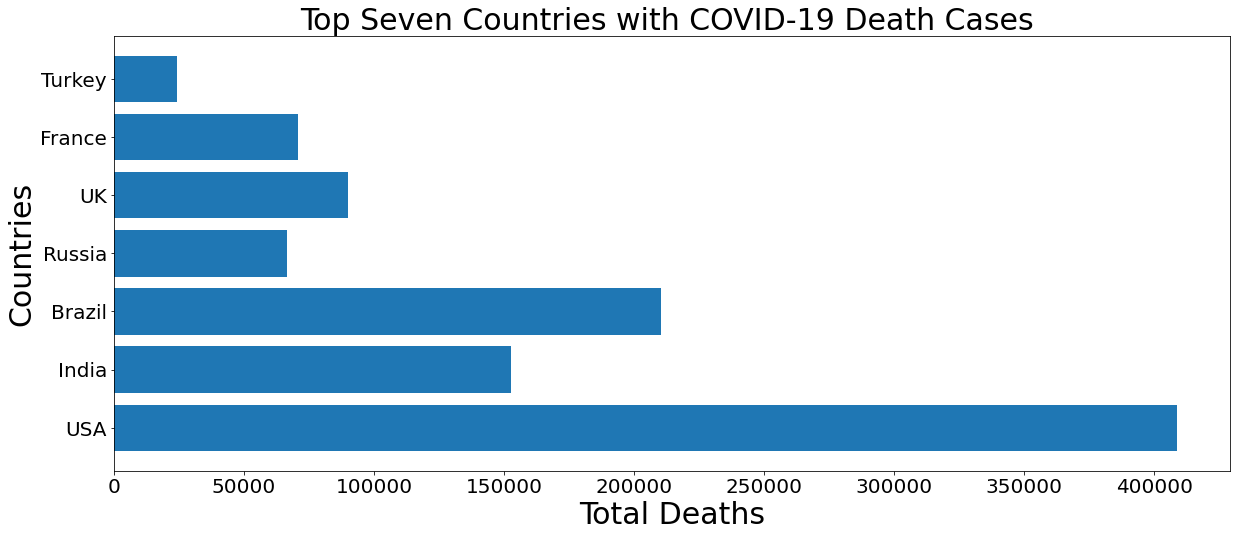

In [29]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["TotalDeaths"])
plt.title("Top Seven Countries with COVID-19 Death Cases ",fontsize = 30)
plt.xlabel("Total Deaths", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [30]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['ActiveCases']= data['ActiveCases'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


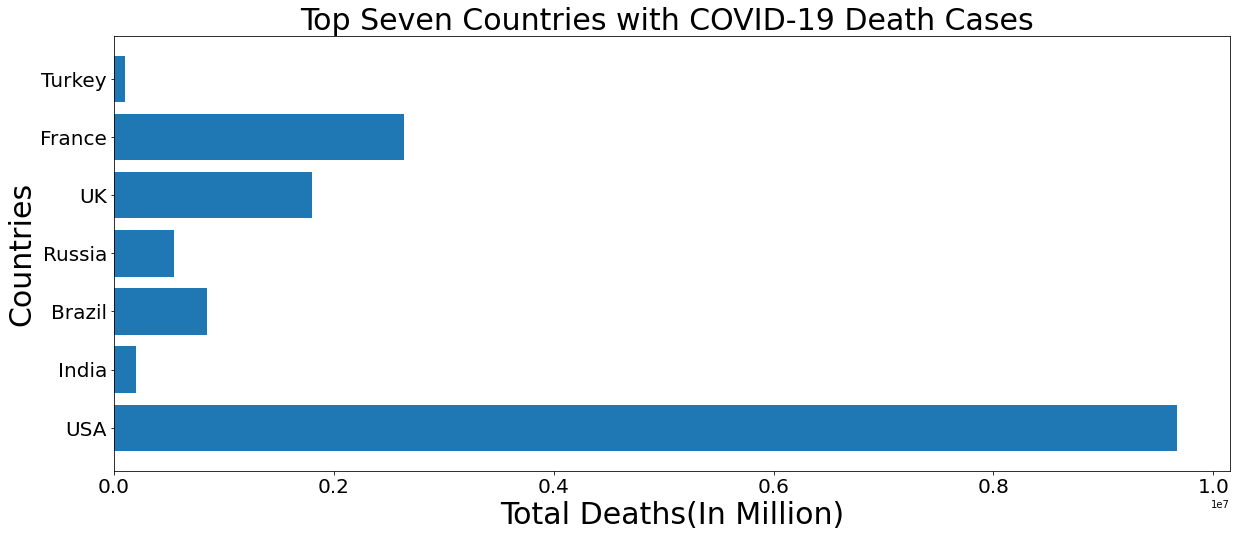

In [31]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["ActiveCases"])
plt.title("Top Seven Countries with COVID-19 Death Cases ",fontsize = 30)
plt.xlabel("Total Deaths(In Million)", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [32]:
data =df.iloc[35:45]

In [33]:
data

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop
35,Serbia,"375,799","+1,688","3,791",+20,"31,536",,"340,472",171,"43,107",435
36,Saudi Arabia,"365,325",+226,"6,335",+6,"357,004",+156,"1,986",327,"10,405",180
37,Hungary,"353,276",+573,"11,520",+111,"231,915","+1,474","109,841",309,"36,621","1,194"
38,Japan,"328,294",,"4,501",,"252,787",,"71,006",973,"2,600",36
39,Jordan,"316,427",+883,"4,170",+17,"301,893","+1,553","10,364",154,"30,845",406
40,Panama,"299,361",,"4,828",,"241,128",,"53,405",239,"68,788","1,109"
41,Nepal,"267,992",+348,"1,969",+4,"262,259",+441,"3,764",,"9,108",67
42,UAE,"260,223","+3,491",756,+5,"231,675","+3,311","27,792",,"26,137",76
43,Lebanon,"255,956",,"1,959",,"154,608",,"99,389",750,"37,594",288
44,Georgia,"249,465","+1,550","2,973",+15,"235,130",+494,"11,362",,"62,602",746


In [34]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['TotalCases']= data['TotalCases'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


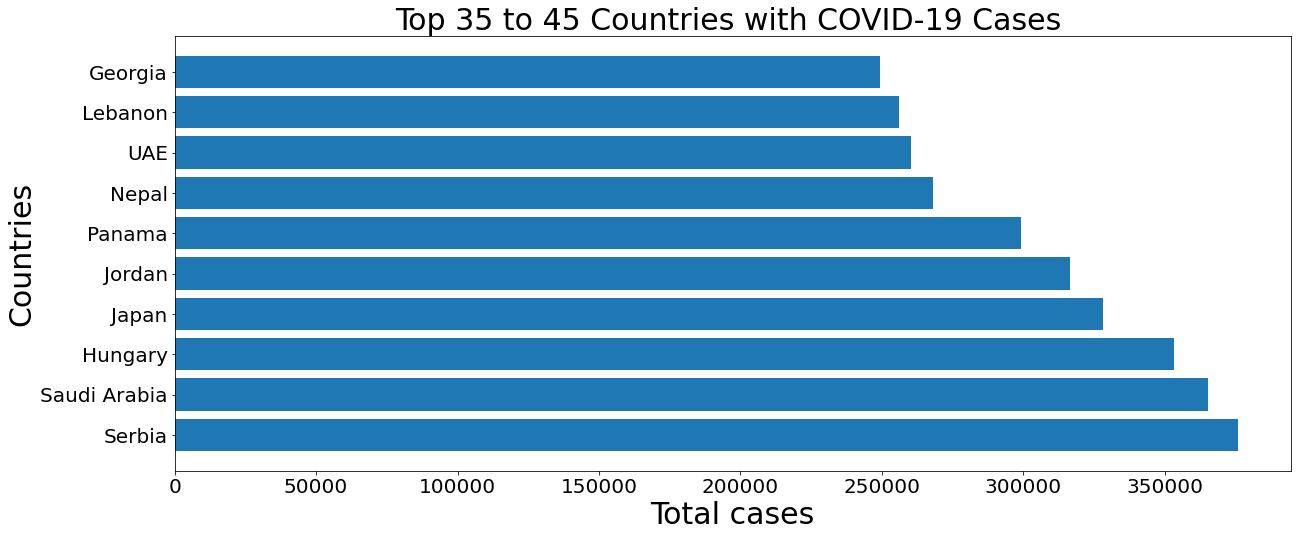

In [35]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["TotalCases"])
plt.title("Top 35 to 45 Countries with COVID-19 Cases ",fontsize = 30)
plt.xlabel("Total cases", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [36]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['TotalDeaths']= data['TotalDeaths'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


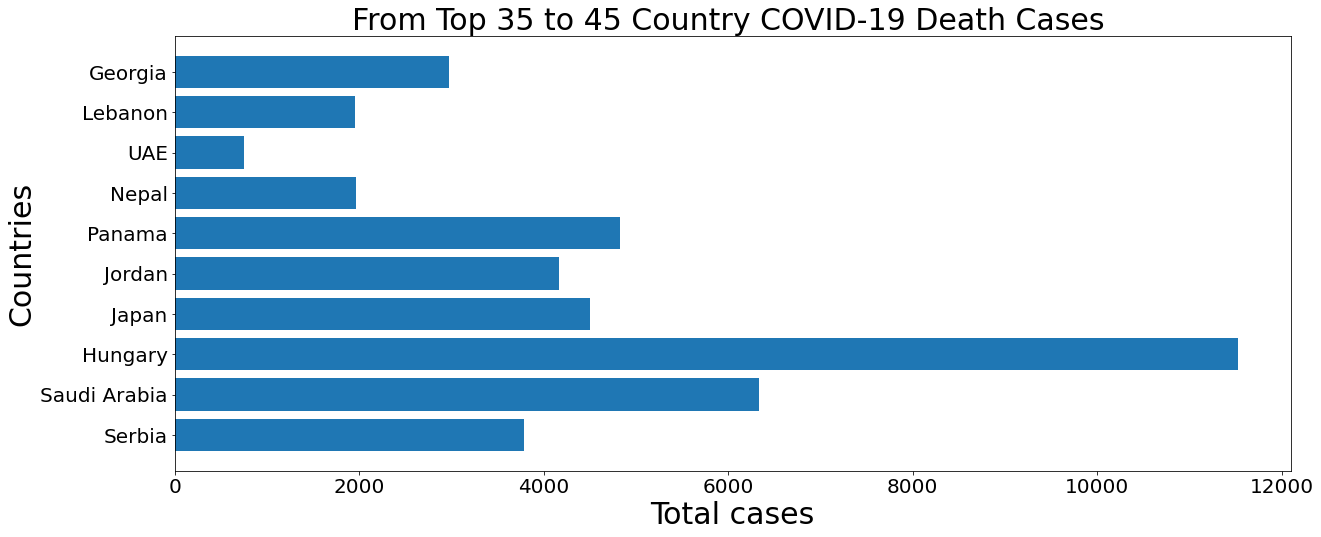

In [37]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["TotalDeaths"])
plt.title("From Top 35 to 45 Country COVID-19 Death Cases ",fontsize = 30)
plt.xlabel("Total cases", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [38]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['TotalRecovered']= data['TotalRecovered'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


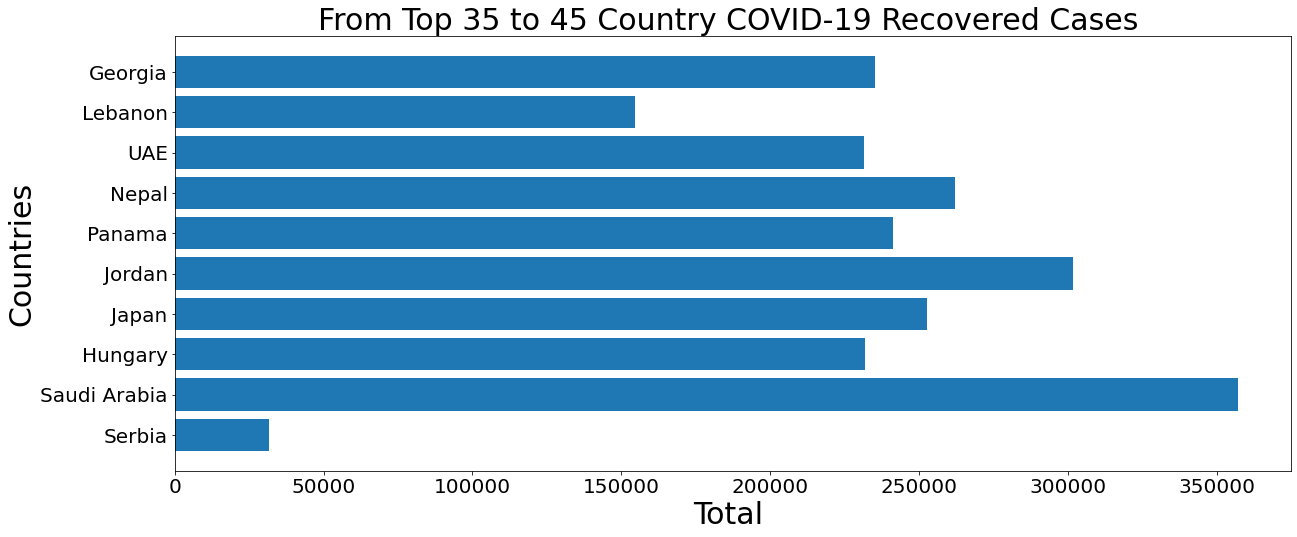

In [39]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["TotalRecovered"])
plt.title("From Top 35 to 45 Country COVID-19 Recovered Cases ",fontsize = 30)
plt.xlabel("Total ", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [40]:
def coma_sep_str_to_int(data):
    data = data.split(',')
    data = ''.join(data)
    data = int(data)
    return data

data['ActiveCases']= data['ActiveCases'].apply(coma_sep_str_to_int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


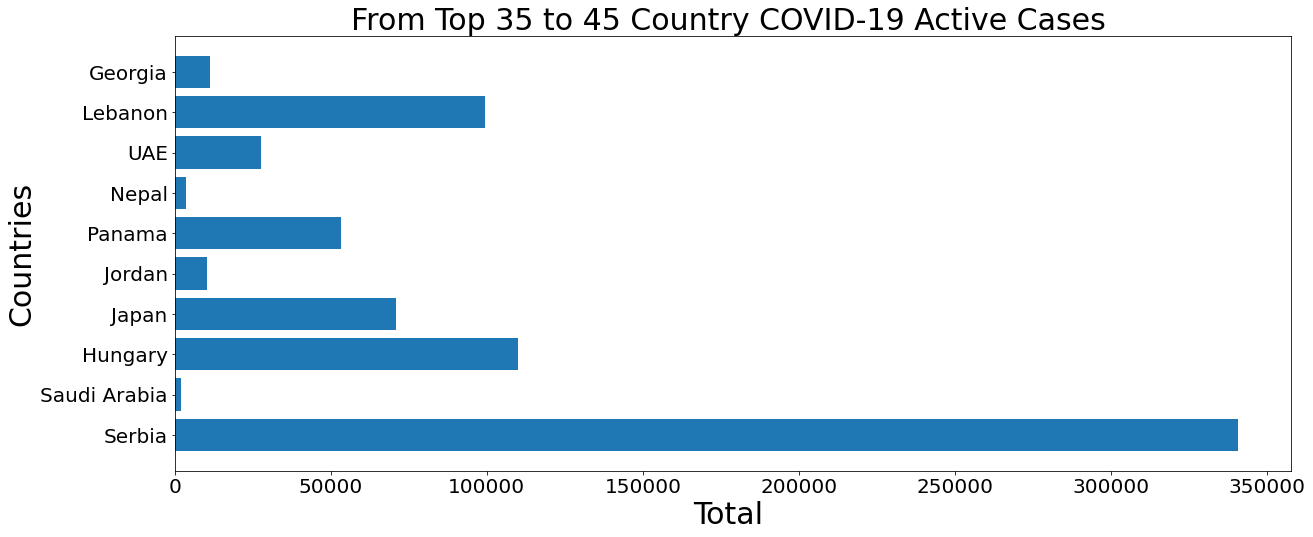

In [41]:
plt.figure(figsize=(20,8))
plt.barh(data["Country"],data["ActiveCases"])
plt.title("From Top 35 to 45 Country COVID-19 Active Cases ",fontsize = 30)
plt.xlabel("Total ", fontsize=30)
plt.ylabel("Countries", fontsize=30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [42]:
data

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop
35,Serbia,375799,"+1,688",3791,+20,31536,,340472,171,"43,107",435
36,Saudi Arabia,365325,+226,6335,+6,357004,+156,1986,327,"10,405",180
37,Hungary,353276,+573,11520,+111,231915,"+1,474",109841,309,"36,621","1,194"
38,Japan,328294,,4501,,252787,,71006,973,"2,600",36
39,Jordan,316427,+883,4170,+17,301893,"+1,553",10364,154,"30,845",406
40,Panama,299361,,4828,,241128,,53405,239,"68,788","1,109"
41,Nepal,267992,+348,1969,+4,262259,+441,3764,,"9,108",67
42,UAE,260223,"+3,491",756,+5,231675,"+3,311",27792,,"26,137",76
43,Lebanon,255956,,1959,,154608,,99389,750,"37,594",288
44,Georgia,249465,"+1,550",2973,+15,235130,+494,11362,,"62,602",746


In [43]:
Nepal = data.loc[data['Country'] == 'Nepal']

In [44]:
Nepal.head(1)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Critical,Tot Cases/1M pop,Deaths/1M pop
41,Nepal,267992,+348,1969,+4,262259,+441,3764,,"9,108",67


In [45]:
topic = ['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases']

In [46]:
Nepal['TotalCases'],Nepal['TotalDeaths'],Nepal['TotalRecovered'],Nepal['ActiveCases']

(41    267992
 Name: TotalCases, dtype: int64,
 41    1969
 Name: TotalDeaths, dtype: int64,
 41    262259
 Name: TotalRecovered, dtype: int64,
 41    3764
 Name: ActiveCases, dtype: int64)

In [47]:
xyz= [Nepal['TotalCases'],Nepal['TotalDeaths'],Nepal['TotalRecovered'],Nepal['ActiveCases']]

In [48]:
xyz

[41    267992
 Name: TotalCases, dtype: int64,
 41    1969
 Name: TotalDeaths, dtype: int64,
 41    262259
 Name: TotalRecovered, dtype: int64,
 41    3764
 Name: ActiveCases, dtype: int64]

In [49]:
for i in range(0, len(xyz)):
    xyz[i] = int(xyz[i])

In [52]:
#xyz

In [53]:
topic = ['Total Cases', 'Total Deaths','Total Recovered','Active Cases']

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

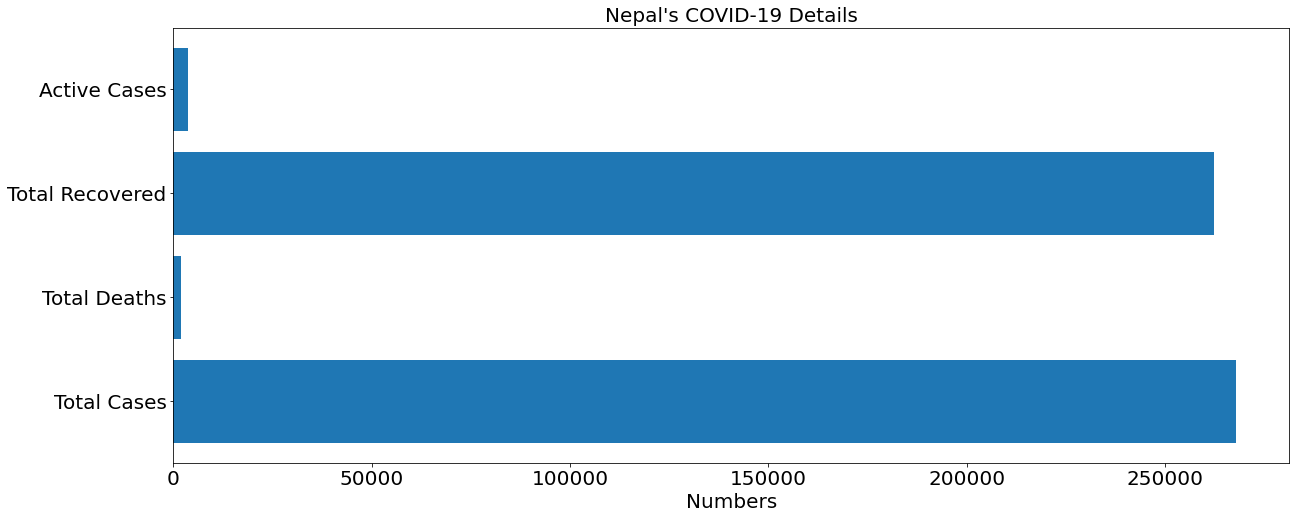

In [54]:
plt.figure(figsize= (20,8))
plt.barh(topic, xyz)
plt.title("Nepal's COVID-19 Details", fontsize=20)
plt.xlabel('Numbers', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)